# ...in Python

## U.S. Treasury Fiscal Data in Python

By Avery Fernandez and Michael T. Moen

**U.S. Department of the Treasury FiscalData API Documentation**: [https://fiscaldata.treasury.gov/api-documentation/](https://fiscaldata.treasury.gov/api-documentation/)

**FiscalData Dataset Search**: [https://fiscaldata.treasury.gov/datasets/](https://fiscaldata.treasury.gov/datasets/) 

This is a useful to for finding endpoints and parameters for this API.

**Terms of Use**: [https://fiscaldata.treasury.gov/api-documentation/#license-and-authorization](https://fiscaldata.treasury.gov/api-documentation/#license-and-authorization)

To get started, import the libraries that will be used in this tutorial:

In [1]:
import requests                     # manages API requests
from pprint import pprint           # creates more readable outputs
import matplotlib.pyplot as plt     # creates visualization of data
import datetime as dt               # manages time data
import matplotlib.dates as mdates   # provides support for dates in matplotlib
import csv                          # manages reading/writing to/from comma separated value (.csv) files

## 1. Treasury Reporting Rates of Exchange

This first example will use the ``/rates_of_exchange/`` endpoint. First, let's assemble our url for API request. This request is made up of three parts:

1. Base url: The URL for the U.S. Treasury Fiscal Data API. All requests to this API must start withs this URL.

2. Endpoint: The specific dataset that we wish to retrieve from this API. In this example, it is ``/rates_of_exchange/``

3. Parameters: Further specifications that we request from the endpoint. In this case, we are requesting a few fields with a filter on the date:

    - Fields: The specific data points that we are requesting from the endpoint. In this example, we retrieve the country, currency, and exchange rate.

    - Filters: Limits on the data received from the endpoint. In this example, we limit the data to the data points recorded on Dec. 31, 2022. We can set the page size to 1000, since the default for this API is to return the first 100 results. This allows us to retrieve the full dataset.

More information on parameters for this API can be found [here](https://fiscaldata.treasury.gov/api-documentation/#parameters). Information on the parameters for this specific endpoint can be found [here](https://fiscaldata.treasury.gov/datasets/treasury-reporting-rates-exchange/treasury-reporting-rates-of-exchange).

In [2]:
# base url for all endpoints
base_url = "https://api.fiscaldata.treasury.gov/services/api/fiscal_service/"

# rates of exchange endpoint
endpoint = "v1/accounting/od/rates_of_exchange"

# parameters for date, country, currency, currency description, and exchange rate
parameters = "?fields=country,currency,exchange_rate&filter=record_date:eq:2022-12-31&page[size]=1000"

# api request
request = requests.get(base_url+endpoint+parameters).json()["data"]

# Length of data
len(request)

180

In [3]:
# display first 3 results
request[:3]

[{'country': 'Afghanistan', 'currency': 'Afghani', 'exchange_rate': '89.11'},
 {'country': 'Albania', 'currency': 'Lek', 'exchange_rate': '106.5'},
 {'country': 'Algeria', 'currency': 'Dinar', 'exchange_rate': '136.467'}]

In [4]:
# use list comprehension to reformat the data to be a list of (country, currency, exchange_rate) tuples
exchange_rate_data = [(entry["country"],
                       entry["currency"],
                       float(entry["exchange_rate"]))
                      for entry in request]

# display first 20 results
exchange_rate_data[:20]

[('Afghanistan', 'Afghani', 89.11),
 ('Albania', 'Lek', 106.5),
 ('Algeria', 'Dinar', 136.467),
 ('Angola', 'Kwanza', 503.65),
 ('Antigua & Barbuda', 'E. Caribbean Dollar', 2.7),
 ('Argentina', 'Peso', 183.0),
 ('Argentina', 'Peso', 203.5),
 ('Armenia', 'Dram', 400.0),
 ('Australia', 'Dollar', 1.471),
 ('Azerbaijan', 'Manat', 1.7),
 ('Bahamas', 'Dollar', 1.0),
 ('Bahrain', 'Dinar', 0.377),
 ('Bangladesh', 'Taka', 105.0),
 ('Barbados', 'Dollar', 2.02),
 ('Belarus', 'New Ruble', 2.518),
 ('Belize', 'Dollar', 2.0),
 ('Benin', 'CFA Franc', 614.84),
 ('Bermuda', 'Dollar', 1.0),
 ('Bolivia', 'Boliviano', 6.86),
 ('Bosnia', 'Marka', 1.83)]

Now, we can save this data to a CSV file if we wish to view and manipulate the data in a spread sheet program.

In [5]:
with open('exchange_rates.csv', 'w', newline='') as f:
    csv_out = csv.writer(f)
    csv_out.writerows(exchange_rate_data)

### Graphing Exchange Rates By Country

To create a useful graph of our data, we will need to remove outliers from dataset, since the extremely high exchange rates of some currencies will otherwise throw off the graph's scale. In our example, we only consider the exchange rates of currencies whose exchange rate is less than 5.

In [6]:
# max exchange rate of data to be graphed
max_exchange_rate = 5

# removes all currencies with an exchange rate greater than the max_exchange_rate
exchange_rate_data = [entry for entry in exchange_rate_data if entry[2] < max_exchange_rate]

# reverses data so that it appears in alphabetical order
exchange_rate_data.reverse()

# splits the data into three separate lists to be used with matplotlib
countries, currencies, exchange_rates = zip(*exchange_rate_data)

Now that we've prepared our data, we can use matplotlib to graph it:

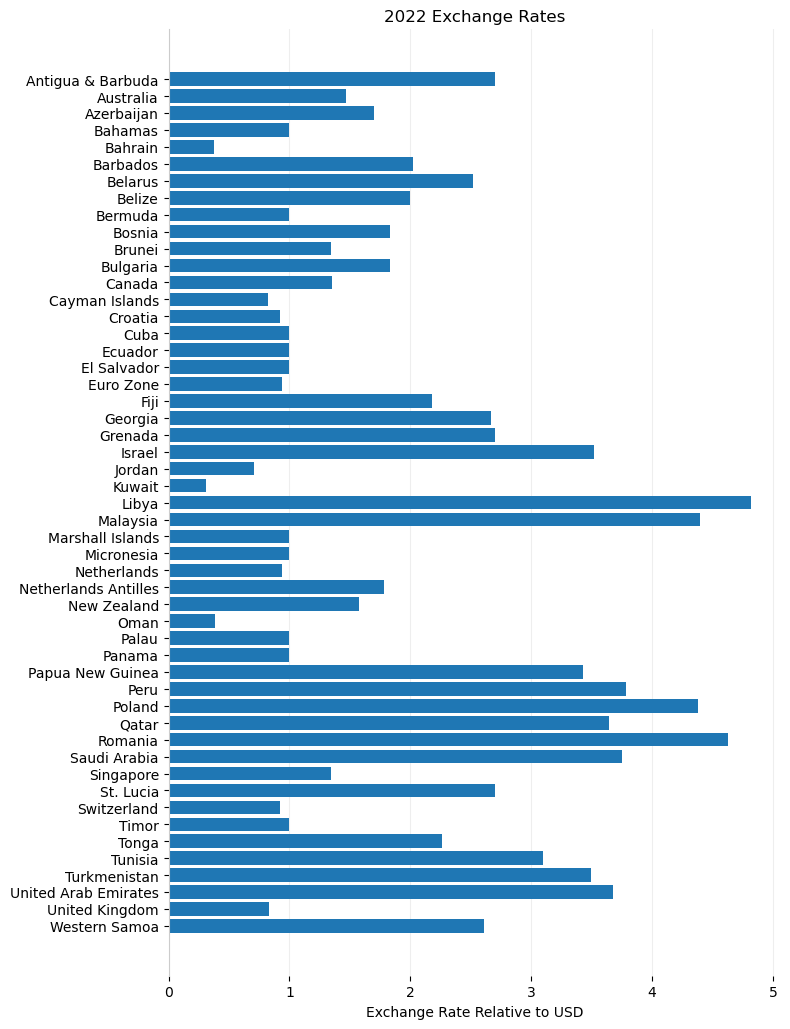

In [7]:
fig, ax1 = plt.subplots(figsize=(8, 10))
ax1.barh(countries, exchange_rates)
ax1.tick_params(axis='y')

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_color('#CCCCCC')
ax1.spines['bottom'].set_visible(False)
ax1.set_axisbelow(True)
ax1.yaxis.grid(False)
ax1.xaxis.grid(True, color='#EEEEEE')

fig.tight_layout()
ax1.set_xlabel("Exchange Rate Relative to USD")
plt.title("2022 Exchange Rates")

plt.show()

## 2. Debt to the Penny

This example will use the ``/debt_to_penny/`` endpoint. Once again, our API request is made up of 3 parts:

1. Base url: The URL for the U.S. Treasury Fiscal Data API. All requests to this API must start withs this URL.

2. Endpoint: The specific dataset that we wish to retrieve from this API. In this example, it is ``/debt_to_penny/``

3. Parameters: Further specifications that we request from the endpoint. In this case, we are requesting a few fields with a filter on the date:

    - Fields: The specific data points that we are requesting from the endpoint. In this example, we retrieve the total public debt for each date.

    - Filters: Limits on the data received from the endpoint. In this example, we limit the data to the data points recorded on dates greater than or equal to (gte) Jan. 1, 2012 and less than Jan. 1, 2023. We can also set the page size to 10000, since the default for this API is to return the first 100 results. This allows us to retrieve the full dataset.

More information on parameters for this API can be found [here](https://fiscaldata.treasury.gov/api-documentation/#parameters). Information on the parameters for this specific endpoint can be found [here](https://fiscaldata.treasury.gov/datasets/debt-to-the-penny/debt-to-the-penny).

In [8]:
# base url for all endpoints
base_url = "https://api.fiscaldata.treasury.gov/services/api/fiscal_service/"

# debt to penny endpoint
endpoint = "v2/accounting/od/debt_to_penny"

# parameters for date and total public debt outstanding
parameters = "?fields=record_date,tot_pub_debt_out_amt&filter=record_date:gte:2012-01-01,record_date:lt:2023-01-01&page[size]=10000"

# api request
request = requests.get(base_url+endpoint+parameters).json()["data"]

# Length of data
len(request)

2763

In [9]:
# display first 5 results
request[:5]

[{'record_date': '2012-01-03', 'tot_pub_debt_out_amt': '15226217488652.33'},
 {'record_date': '2012-01-04', 'tot_pub_debt_out_amt': '15236542247490.89'},
 {'record_date': '2012-01-05', 'tot_pub_debt_out_amt': '15236541899973.10'},
 {'record_date': '2012-01-06', 'tot_pub_debt_out_amt': '15236532960597.70'},
 {'record_date': '2012-01-09', 'tot_pub_debt_out_amt': '15236506139986.86'}]

Now, we'll find the total public debt reported in the first recorded date of each month in the dataset:

In [10]:
monthly_debts = []  # stores debt per month in (date, debt) tuples
recent_month = ""   # tracks last month recorded so we only record the first value of every month

for data_point in request:
    
    month = data_point["record_date"][5:7]
    year = data_point["record_date"][0:4]
    
    # check to see if it is a new month
    if recent_month != month:
        recent_month = month     # updates the recentMonth point
        # formats the date to only include the month and year
        date = month + "/" + year
        date = dt.datetime.strptime(date,'%m/%Y').date()
        monthly_debts.append((date, float(data_point["tot_pub_debt_out_amt"])))

# display first 5 results
monthly_debts[:5]

[(datetime.date(2012, 1, 1), 15226217488652.33),
 (datetime.date(2012, 2, 1), 15330778119850.6),
 (datetime.date(2012, 3, 1), 15501014716143.72),
 (datetime.date(2012, 4, 1), 15620325998403.96),
 (datetime.date(2012, 5, 1), 15673229738379.98)]

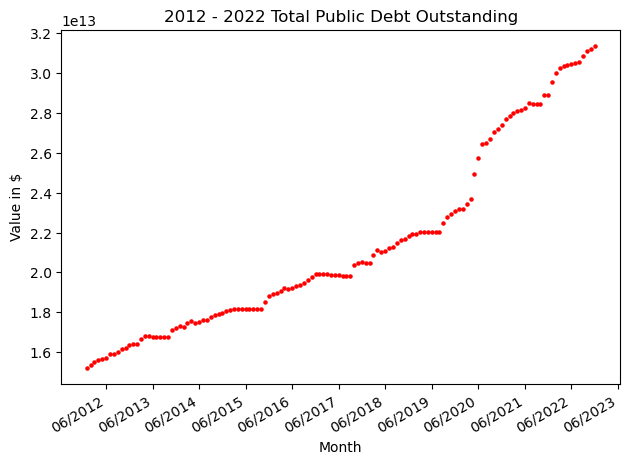

In [11]:
dates, debts = zip(*monthly_debts)

fig, ax1 = plt.subplots()
ax1.set_ylabel("Value in $")
ax1.scatter(dates,debts, s=5, color="red")
ax1.tick_params(axis='y')

fig.tight_layout()
ax1.set_xlabel("Month")
plt.title("2012 - 2022 Total Public Debt Outstanding")

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=12))
plt.gcf().autofmt_xdate()

plt.show()

## 3. Social Security Administration Data

For the next example, we'll look at the ``/statement_net_cost/`` endpoint:

In [13]:
# base url for all endpoints
base_url = "https://api.fiscaldata.treasury.gov/services/api/fiscal_service/"

# debt to statement net cost endpoint
endpoint = "v2/accounting/od/statement_net_cost"

# parameters for date and total public debt outstanding
parameters = "?fields=record_date,gross_cost_bil_amt,earned_revenue_bil_amt,agency_nm&filter=record_date:gte:2012-01-01,record_date:lt:2023-01-01&page[size]=10000"

# api request
request = requests.get(base_url+endpoint+parameters).json()["data"]

# length of data
len(request)

880

In [14]:
# display first 3 results
request[:3]

[{'record_date': '2012-09-30',
  'gross_cost_bil_amt': '48.2',
  'earned_revenue_bil_amt': '19.1',
  'agency_nm': 'Office of Personnel Management'},
 {'record_date': '2012-09-30',
  'gross_cost_bil_amt': '107.3',
  'earned_revenue_bil_amt': 'null',
  'agency_nm': 'Department of Labor'},
 {'record_date': '2012-09-30',
  'gross_cost_bil_amt': '79.0',
  'earned_revenue_bil_amt': '0.8',
  'agency_nm': 'Department of Transportation'}]

In [28]:
yearly_costs_and_revenues = [] # stores costs in (date, cost, revenue) tuples
recent_year = ""               # tracks last month recorded so we only record the first value of every month

for data_point in request:
    
    year = data_point["record_date"][0:4]
    
    # checks to see if it is a new month
    if (recent_year != year) and (data_point["agency_nm"] == "Social Security Administration"):
        
        month = data_point["record_date"][5:7]
        revenue = float(data_point["earned_revenue_bil_amt"])
        cost = float(data_point["gross_cost_bil_amt"])
        
        recent_year = year
        
        yearly_costs_and_revenues.append((year, cost, revenue))

# splits tuple into three separate lists for matplotlib to graph
dates, costs, revenues = zip(*yearly_costs_and_revenues)

# display results
yearly_costs_and_revenues

[('2012', 782.9, 0.4),
 ('2013', 822.9, 0.3),
 ('2014', 867.4, 0.4),
 ('2015', 945.0, 0.3),
 ('2016', 982.1, 0.3),
 ('2017', 999.1, 0.3),
 ('2018', 999.1, 0.3),
 ('2019', 1038.5, 0.2),
 ('2020', 1101.2, 0.3),
 ('2021', 1157.6, 0.3),
 ('2022', 1294.4, 0.3)]

In [33]:
# Print Revenue and cost as a table:
print("year     earned_revenue_bil_amt    gross_cost_bil_amt")
for item in yearly_costs_and_revenues:
    print ("{:<8} {:<25} {:<20}".format(item[0], item[2], item[1]))

year     earned_revenue_bil_amt    gross_cost_bil_amt
2012     0.4                       782.9               
2013     0.3                       822.9               
2014     0.4                       867.4               
2015     0.3                       945.0               
2016     0.3                       982.1               
2017     0.3                       999.1               
2018     0.3                       999.1               
2019     0.2                       1038.5              
2020     0.3                       1101.2              
2021     0.3                       1157.6              
2022     0.3                       1294.4              


## 4. Income Tax Refunds Issued

This example will use the ``/income_tax_refunds_issued/`` endpoint, which is an extension of the ``/dts/ (daily treasury statement)`` endpoint. Once again, our API request is made up of 3 parts:

1. Base url: The URL for the U.S. Treasury Fiscal Data API. All requests to this API must start withs this URL.

2. Endpoint: The specific dataset that we wish to retrieve from this API. In this example, it is ``/income_tax_refunds_issued/``

3. Parameters: Further specifications that we request from the endpoint. In this case, we are requesting a few fields with a filter on the date:

    - Fields: The specific data points that we are requesting from the endpoint. In this example, we retrieve the tax refund types, descriptions, and amounts rounded to the newarest million for each date.

    - Filters: Limits on the data received from the endpoint. In this example, we limit the data to the data points recorded on dates greater than or equal to (gte) Jan. 1, 2022 and less than Jan. 1, 2023. We also limit the page size to 10000, since the default for this API is to return the first 100 results. This allows us to retrieve the full dataset.

More information on parameters for this API can be found [here](https://fiscaldata.treasury.gov/api-documentation/#parameters). Information on the parameters for this specific endpoint can be found [here](https://fiscaldata.treasury.gov/datasets/daily-treasury-statement/operating-cash-balance).

In [35]:
# base url for all endpoints
base_url = "https://api.fiscaldata.treasury.gov/services/api/fiscal_service/"

# debt to statement net cost endpoint
endpoint = "/v1/accounting/dts/income_tax_refunds_issued"

# parameters for date, tax refund type, tax refund type description, and tax refund amount (rounded to the nearest million)
parameters = "?fields=record_date,tax_refund_type,tax_refund_type_desc,tax_refund_today_amt&filter=record_date:gte:2022-01-01,record_date:lt:2023-01-01&page[size]=10000"

# api request
request = requests.get(base_url+endpoint+parameters).json()["data"]

# display length
len(request)

1756

In [36]:
# display first 5 results
request[:5]

[{'record_date': '2022-01-03',
  'tax_refund_type': 'IRS - Advanced Child Tax Credit (Checks)',
  'tax_refund_type_desc': 'null',
  'tax_refund_today_amt': '0'},
 {'record_date': '2022-01-03',
  'tax_refund_type': 'IRS - Advanced Child Tax Credit (EFT)',
  'tax_refund_type_desc': 'null',
  'tax_refund_today_amt': '0'},
 {'record_date': '2022-01-03',
  'tax_refund_type': 'IRS - Economic Impact Payments (Checks)',
  'tax_refund_type_desc': 'null',
  'tax_refund_today_amt': '0'},
 {'record_date': '2022-01-03',
  'tax_refund_type': 'IRS - Economic Impact Payments (EFT)',
  'tax_refund_type_desc': 'null',
  'tax_refund_today_amt': '0'},
 {'record_date': '2022-01-03',
  'tax_refund_type': 'IRS Tax Refunds Business',
  'tax_refund_type_desc': 'Checks',
  'tax_refund_today_amt': '0'}]

In [37]:
tax_refunds_by_type_and_day = [] # stores values in (date, refund type, refund type description, refund amount) tuples

for data_point in request:
        
    date = data_point["record_date"]
    refund_type = data_point["tax_refund_type"]
    refund_desc = data_point["tax_refund_type_desc"]
    amount = data_point["tax_refund_today_amt"]
    
    tax_refunds_by_type_and_day.append((date, refund_type, refund_desc, amount))

# display first 20 results
tax_refunds_by_type_and_day[:20]

[('2022-01-03', 'IRS - Advanced Child Tax Credit (Checks)', 'null', '0'),
 ('2022-01-03', 'IRS - Advanced Child Tax Credit (EFT)', 'null', '0'),
 ('2022-01-03', 'IRS - Economic Impact Payments (Checks)', 'null', '0'),
 ('2022-01-03', 'IRS - Economic Impact Payments (EFT)', 'null', '0'),
 ('2022-01-03', 'IRS Tax Refunds Business', 'Checks', '0'),
 ('2022-01-03', 'IRS Tax Refunds Business', 'EFT', '0'),
 ('2022-01-03', 'IRS Tax Refunds Individual', 'Checks', '249'),
 ('2022-01-03', 'IRS Tax Refunds Individual', 'EFT', '12'),
 ('2022-01-04', 'IRS - Advanced Child Tax Credit (Checks)', 'null', '0'),
 ('2022-01-04', 'IRS - Advanced Child Tax Credit (EFT)', 'null', '0'),
 ('2022-01-04', 'IRS - Economic Impact Payments (Checks)', 'null', '0'),
 ('2022-01-04', 'IRS - Economic Impact Payments (EFT)', 'null', '0'),
 ('2022-01-04', 'IRS Tax Refunds Business', 'Checks', '1519'),
 ('2022-01-04', 'IRS Tax Refunds Business', 'EFT', '35'),
 ('2022-01-04', 'IRS Tax Refunds Individual', 'Checks', '0'),


Now, we can save this data to a CSV file if we wish to view and manipulate the data in a spread sheet program.

In [168]:
with open("daily_tax_returns.csv", "w", newline='') as f:
    csv_out = csv.writer(f)
    csv_out.writerows(tax_refunds_by_type_and_day)

Finally, let's graph the tax return data using matplotlib. To do this, we must first add up the amounts for each day of the period:

In [39]:
# stores tax refund data in {date: amount} pairings
tax_refunds_by_day = {}

for data_point in tax_refunds_by_type_and_day:
    
    # convert date into datetime object for matplotlib
    date = dt.datetime.strptime(data_point[0],"%Y-%m-%d").date()
    amount = float(data_point[3])
    
    if date in tax_refunds_by_day:
        tax_refunds_by_day[date] += amount
    else:
        tax_refunds_by_day[date] = amount

dates = list(tax_refunds_by_day.keys())
amounts = list(tax_refunds_by_day.values())

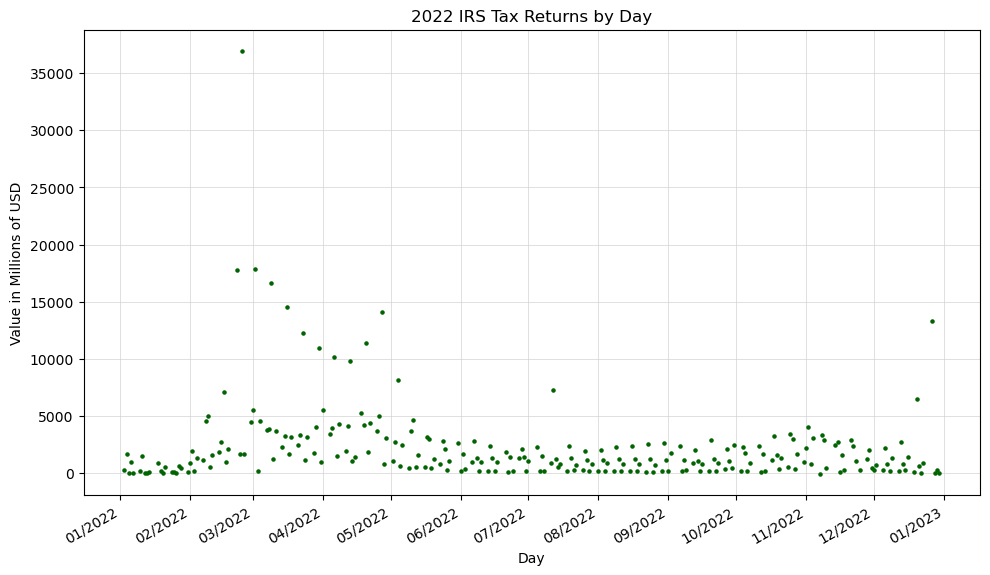

In [42]:
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.set_ylabel("Value in Millions of USD")
ax1.scatter(dates, amounts, s=5, color="darkgreen")
ax1.tick_params(axis='y')

fig.tight_layout()
ax1.set_xlabel("Day")
ax1.grid(linewidth=0.5, color='lightgray')
ax1.set_axisbelow(True)
plt.title("2022 IRS Tax Returns by Day")

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()

plt.show()